In [56]:
# now we have to preprocess the second data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import  f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [57]:
data1 = pd.read_csv("data1final.csv")
# data2 = pd.read_csv("data2final.csv")
data3 = pd.read_csv("data3final.csv")
data4 = pd.read_csv("data4final.csv")

In [58]:
data = pd.concat([data1, data3, data4], ignore_index=True)

In [59]:
data = data.dropna()
data.isna().sum()

Unnamed: 0         0
Tweet              0
target             0
tokenized_tweet    0
cleaned_tweet      0
dtype: int64

In [60]:

data['target'] = data['target'].replace(-1, 0)
data["target"].value_counts()

target
1    9315
0    7424
Name: count, dtype: int64

In [61]:

# # Sample 10,000 positive samples
# positive_samples = data[data['target'] == 1].sample(n=10000, random_state=42)

# # Include all negative samples
# negative_samples = data[data['target'] == 0]

# # Concatenate positive and negative samples
# balanced_data = pd.concat([positive_samples, negative_samples], ignore_index=True)

# # Shuffle the dataset
# data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [62]:
data.tail()

,Unnamed: 0,Tweet,target,tokenized_tweet,cleaned_tweet
16736,8432,"""RT @iDhmi: #توصيات_تويتسو تطبيق يوتيوب الأطفا...",1,توصيات تويتسو تطبيق يوتيوب الأطفال جوجل يعرض ا...,"['توصيات', 'تويتسو', 'تطبيق', 'يوتيوب', 'الأطف..."
16737,8433,سي:#إبراهيم_محلب يشارك باحتفالية تنزانيا بمناس...,1,سي إبراهيم محلب يشارك باحتفالية تنزانيا بمناسب...,"['سي', 'إبراهيم', 'محلب', 'يشارك', 'باحتفالية'..."
16738,8434,"""كلب إسرائيل وسيفها الإرهابي بوتن قاتل النساء ...",0,كلب إسرائيل وسيفها الإرهابي بوتن قاتل النساء و...,"['كلب', 'إسرائيل', 'وسيفها', 'الإرهابي', 'بوتن..."
16739,8435,"""احمد فتفت مغضوب بمجرد اعترضو ميشال عون . (ديم...",0,احمد فتفت مغضوب بمجرد اعترضو ميشال عون ديمقراطيه,"['احمد', 'فتفت', 'مغضوب', 'بمجرد', 'اعترضو', '..."
16740,8436,"""قناة آسيا: مندوب #سوريا #الأمم_المتحدة بشار ا...",0,قناة آسيا مندوب سوريا الأمم المتحدة بشار الجعف...,"['قناة', 'آسيا', 'مندوب', 'سوريا', 'الأمم', 'ا..."


In [63]:
dataf = data[["tokenized_tweet","target"]]

In [64]:
dataf.head()

,tokenized_tweet,target
0,mealem bourjilia illi yefehmouch yelzmou yaqra...,1
1,ya mealllam,1
2,mahlek zin fannena hloua,1
3,hhhhh bliiiiiiiida hanen,0
4,nikraha makhyebha pffff,0


In [65]:
tweets_train, tweets_test, target_train, target_test = train_test_split(data.tokenized_tweet,data.target,test_size = 0.2)

Text processing can be done using the following techniques:

- Bag of Words

- TF-IDF

- Word2Vec

## Bag Of Words

In [66]:
tweets_train.head()

16632    أردوغان للعبادي اعرف حدودك ولن نأخذ أوامر بشأن...
16197    أناشد الجميع الابتعاد الاقتتال الأهلي والالتزا...
613      brabi ken fema kilma ghir msata qouloli bil wa...
8583                          النون نستنكر ندين نشجب نوافق
3707                              عبد الفتاح نحبوك نحترموك
Name: tokenized_tweet, dtype: object

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

bow=CountVectorizer(lowercase=True, min_df=2, max_features=1000)
#bow.fit(tweets_train)
bow_df=bow.fit_transform(tweets_train).toarray()

In [68]:
import joblib
joblib.dump(bow, 'bow.joblib')

['bow.joblib']

In [69]:
target_train =np.array(target_train)

In [53]:
lreg = LogisticRegression()
lreg.fit(bow_df, np.array(target_train)) # training the model

prediction = lreg.predict(bow_df) # predicting on the validation set
#prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#prediction_int = prediction_int.astype(np.int64)
prediction
#f1_score(target_train, prediction_int)

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

cf_matrix =confusion_matrix(target_train,prediction_int)

tn, fp, fn, tp = confusion_matrix(target_train,prediction_int).ravel()

print("Precision: {:.2f}%".format(100 * precision_score(target_train, prediction_int)))
print("Recall: {:.2f}%".format(100 * recall_score(target_train, prediction_int)))
print("F1 Score: {:.2f}%".format(100 * f1_score(target_train,prediction_int)))

Precision: 66.82%
Recall: 97.02%
F1 Score: 79.13%


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

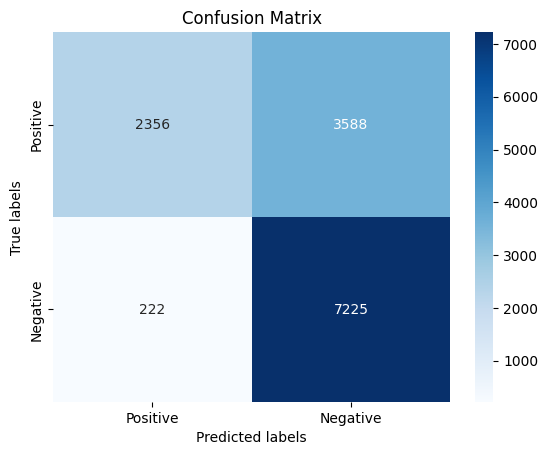

In [22]:

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [23]:
import joblib

joblib.dump(lreg, 'tweets_model.joblib')

['tweets_model.joblib']

In [20]:


# Define models
models = {
    # "Logistic Regression": LogisticRegression(),
    # "SVM": SVC(probability=True),  # probability=True to enable probability estimates
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(bow_df, target_train)
    prediction = model.predict_proba(bow_df)
    prediction_int = prediction[:,1] >= 0.3
    prediction_int = prediction_int.astype(np.int64)
    f1 = f1_score(target_train, prediction_int)
    joblib.dump(lreg, f'tweets_model{name}.joblib')
    print(f"F1 Score for {name}: {f1}")


F1 Score for Random Forest: 0.8912782316194138
F1 Score for Decision Tree: 0.9070918086860912


In [24]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\el\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\el\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
import re
import nltk
import joblib
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Load the trained model
model = joblib.load("tweets_model.joblib")
model1 = joblib.load("tweets_modelDecision Tree.joblib")
model2 = joblib.load("tweets_modelRandom Forest.joblib")

def contains_arabic(text):
    arabic_pattern = re.compile('[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF\uFB50-\uFDFF]+')
    return arabic_pattern.search(text) is not None

def clean_tweet(tweet):
    # Check if tweet contains Arabic characters
    if contains_arabic(tweet):
        # If it contains Arabic, apply cleaning for Arabic tweets
        tweet = re.sub(r'https?://[^\s]+', ' ', tweet)  # Remove URLs
        tweet = re.sub(r'[^؀-ۿ]+', ' ', tweet)  # Remove non-Arabic characters
        tweet = re.sub(r'\W+', ' ', tweet)
        tweet = ' '.join([w for w in tweet.split() if len(w) > 1])  # Remove single character words
        tweet = ' '.join([lemma.lemmatize(x, nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words])
    else:
        tweet = re.sub(r'https?://[^\s]+', ' ', tweet)  # Remove URLs
        tweet = re.sub(r'\$[^\s]+', ' ', tweet)        # Remove $symbols
        tweet = re.sub(r'\@[^\s]+', ' ', tweet)        # Remove @mentions
        tweet = re.sub(r'[^a-zA-Z\'\s]', ' ', tweet)  
        tweet = ' '.join([w for w in tweet.split() if len(w) > 1])  # Remove single character words
        tweet = ' '.join([lemma.lemmatize(x, nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words])

    return tweet


new_tweets = ["يا جماعة الخير"]

for new_tweet in new_tweets:
    # Preprocess the new tweet
    preprocessed_tweet = clean_tweet(new_tweet)
    
    preprocessed_tweet = TweetTokenizer().tokenize(preprocessed_tweet)
    
    # Transform the preprocessed tweet into BoW representation
    bow_representation = bow.transform([" ".join(preprocessed_tweet)]).toarray()
    print(bow_representation)
    # Use the trained model to predict the probability of the tweet belonging to each class
    prediction_prob = model.predict_proba(bow_representation)
    prediction_prob1 = model1.predict_proba(bow_representation)
    prediction_prob2 = model2.predict_proba(bow_representation)
    
    threshold = 0.6  # You can adjust this threshold based on your model's performance
    predicted_label = 1 if prediction_prob[0, 1] >= threshold else 0
    predicted_label1 = 1 if prediction_prob1[0, 1] >= threshold else 0
    predicted_label2 = 1 if prediction_prob2[0, 1] >= threshold else 0
    
    # Print the predicted label
    if predicted_label == 1:
        print(f"{new_tweet} : Positive tweet")
    else:
        print(f"{new_tweet} : Negative tweet")
    if predicted_label1 == 1:
        print(f"{new_tweet} : Positive tweet")
    else:
        print(f"{new_tweet} : Negative tweet")
    if predicted_label2 == 1:
        print(f"{new_tweet} : Positive tweet")
    else:
        print(f"{new_tweet} : Negative tweet")


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# we need to change that data set 